# Logistics Regression on Titanic Dataset

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
#Importing the file 
df = pd.read_csv('Complete Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
print("No. of Passengers in original data:" +str(len(df.index)))

No. of Passengers in original data:1309


## Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
#Checking null values
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

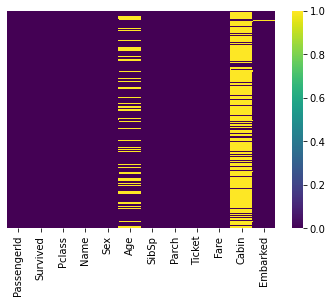

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

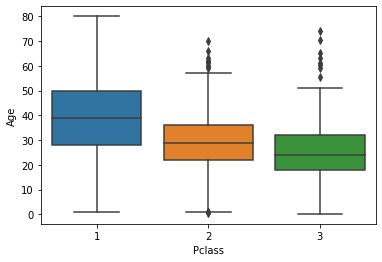

In [8]:
sns.boxplot(x="Pclass", y="Age", data=df)

In [9]:
#dropping the cabin column
df.drop("Cabin", axis=1,inplace=True)

In [10]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
#Replacing null values with 0
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

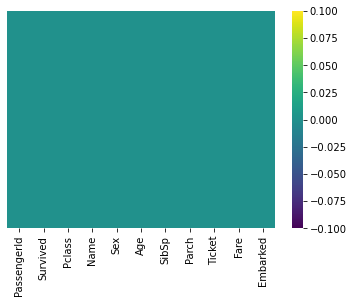

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [14]:
#Converting string columns into category datatype
df["Name"] = df["Name"].astype("category")
df["Name"] = df["Name"].cat.codes

df["Sex"] = df["Sex"].astype("category")
df["Sex"] = df["Sex"].cat.codes

df["Ticket"] = df["Ticket"].astype("category")
df["Ticket"] = df["Ticket"].cat.codes

df["Embarked"] = df["Embarked"].astype("category")
df["Embarked"] = df["Embarked"].cat.codes

In [15]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,149,1,22.0,1,0,553,7.2500,2
1,2,1,1,269,0,38.0,1,0,637,71.2833,0
2,3,1,3,469,0,26.0,0,0,717,7.9250,2
3,4,1,1,381,0,35.0,1,0,53,53.1000,2
4,5,0,3,22,1,35.0,0,0,506,8.0500,2


In [16]:
df.drop(["Name","Ticket","PassengerId"], axis=1,inplace=True)

In [17]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Splitting into X and y

In [18]:
X = df.drop(columns="Survived")

In [19]:
y=df["Survived"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

## Model Building

### Logistics Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [24]:
y_logreg_pred = logreg.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
classification_report(y_test,y_logreg_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.88      0.88       135\n           1       0.78      0.77      0.78        74\n\n    accuracy                           0.84       209\n   macro avg       0.83      0.83      0.83       209\nweighted avg       0.84      0.84      0.84       209\n'

### Using Confusion Matrix
A Confusion Matrix is nothing but a 2x2 Matrix which have four outcomes. This basically tells you how accurate your values are.

    PN   PY
    
AN

AY

(where PN = Predicted NO,
       PY = Predicted YES,
       AN = Actual NO,
       AY = Actual YES,

**To calculate accuracy score**, you say:
    (PN'AN + PY'AY) / (PN'AN + PY'AN + PN'AY + PY'AY)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test, y_logreg_pred)

array([[119,  16],
       [ 17,  57]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, y_logreg_pred)

0.8421052631578947